Let's say that you have a dataset that you would like to quickly understand.

The point of this doc is to walk through how:

* to access an example dataset
* massage the data to something easier to work with
* group and aggregate the data
* display a table of the results
* show a chart 

![Screenshot of Chart](../img/gapMinderLifeFertilityChart1.png)

## Assumptions

The [How to Use]{@tutorial howToUse} navbar tutorial talks about what [Jupyter Notebooks]() are - a REPL format that intermixes code (and or their results) with markdown/text blocks to provide context.

It also talks about how to install Jupyter, and the [iJavaScript language kernel]() to provide JavaScript language support.

While there are some amazing other options for using notebooks:

* [ObservableHQ](https://observablehq.com) - a jupyter like experience working with javascript out of the box
* [Visual Studio Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) - now has direct support for Jupyter Notebooks
...

We will assume you have:

* Jupyter Lab installed
* iJavaScript kernel installed
* npm install [jupyter-ijavascript-utils](https://www.npmjs.com/package/jupyter-ijavascript-utils) - in the directory you launched Jupyter Lab
* Jupyter Lab running - (by running the command `Jupyter Lab`)

Please see the [How to Use]{@tutorial howToUse} navbar tutorial for details.

# Require libraries in the Notebook

Jupyter (unlike ObservableHQ) works in a top down order of evaluation,
so to use the [jupyter-ijavascript-utils](https://www.npmjs.com/package/jupyter-ijavascript-utils) library,

Lets include a cell at the top with our `require` statements.

```
utils = require('jupyter-ijavascript-utils');
//-- any other imports

'Libraries successfully imported';
```

![Screenshot of executed cell](../img/walkthrough_librariesImported.png)

(Executing the cell, through the `▷` icon will render `Libraries successfully imported` underneath)

In [1]:
utils = require('jupyter-ijavascript-utils');
//-- any other imports

'Libraries successfully imported';

'Libraries successfully imported'

## Variable Scope

We did not use `let` or `const` when defining the variable

This puts the variable in the `global` / `document` scope.

You can absolutely use `let`, `const`, `var`, etc. to define your variables, but this will cause a problem if you execute your cell again at any time.
This will throw an error as the variable cannot be redefined.

![Screenshot of running the cell again](../img/walkthrough_letError.png)

Another option is to use a `{}` scope block for the cell.

This will not throw an error, but it will however not make the variable available for the next cell.

![Screenshot of accessing a scoped variable](../img/walkthrough_scopeError.png)

## Return Value of a Cell

Note that we included a string at the end of the cell:

```
'Libraries successfully imported';
```

The last value accessed in a cell is by default passed as the `result` of the cell.

(You can do this manually by running the command `$$.sendResult('this is the return value');`)

If you do not include this statement, the iJavaScript will attempt to convert the last value to JSON,
and this can cause quite a bit of scrolling.

For cells where we care more about the `side effects` of running the cell
(i.e. there is no result we want, Consider putting a descriptive string, and collapsing the code)

# Adding in a Text Node

Next lets add in a Text Node, to help us remember where our code starts:

Click the `+` button in the toolbar to make a new cell.

Enter the following:

```
# Gap Minder DataSet
```

This time, change the dropdown in the toolbar from `Code` to `Text`

Note that the cell turns BLUE.

(Executing the cell, through the `▷` icon will render the text out as a header)

![Screenshot](../img/walkthrough_cellType.png)

# Accessing a Sample Dataset

The Vega team has a [Sample Datasets library](https://www.npmjs.com/package/vega-datasets)

The jupyter-ijavascript-utils library references it, so you can get sample data quickly.

We can see the list of the datasets available:


In [2]:
utils.datasets.list().slice(0, 5);

// [
//   'annual-precip.json',
//   'anscombe.json',
//   'barley.json',
//   'budget.json',
//   'budgets.json',
//   'burtin.json',
//   ...
// ]

[
  'annual-precip.json',
  'anscombe.json',
  'barley.json',
  'budget.json',
  'budgets.json'
]

The DataSet we want is the [facinating GapMinder Life Expectancy study](https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/)

In [3]:
$$.async()
utils.datasets.fetch('gapminder.json')
.then(data => {
	gapMinder = data;
	$$.sendResult(`captured gap minder records: ${gapMinder.length}`);
});

'captured gap minder records: 693'

As we called `$$.async()` - the cell knows that it should pause execution for the next cell until `$$.sendResult(...)` is called.

**Note** - the `utils.ijs.await` method available in the library can simplify this call, to support await.

In [4]:
//-- does the same thing as the cell above
utils.ijs.await(async ($$, console) => {
	gapMinder = await utils.datasets.fetch('gapminder.json');
    return `captured gap minder records: ${gapMinder.length}`;
});

'captured gap minder records: 693'

See the [ijs.await()](https://jupyter-ijavascript-utils.onrender.com/module-ijs.html#.await) docs for more.

# Understanding the Data

One option to understand the kinds of data is to always look at the first record:

In [5]:
gapMinder[0];

// gives:
// {
//   year: 1955,
//   country: 'Afghanistan',
//   cluster: 0,
//   pop: 8891209,
//   life_expect: 30.332,
//   fertility: 7.7
// }

{
  year: 1955,
  country: 'Afghanistan',
  cluster: 0,
  pop: 8891209,
  life_expect: 30.332,
  fertility: 7.7
}

The Utilities also include two additional methods that can help:

[object.generateSchema(object | array)](https://jupyter-ijavascript-utils.onrender.com/module-object.html#.generateSchema)

This generates a schema of all objects in the collection, 
and of the objects those contain (deep introspection),

It tells us that there are no objects further down with additional fields, and all the fields are always populated.

But this can leave a bit to be desired for the types of properties.


In [6]:
utils.object.generateSchema(gapMinder);

// {
//   '$schema': 'http://json-schema.org/draft-04/schema#',
//   type: 'array',
//   items: {
//     type: 'object',
//     properties: {
//       year: [Object],
//       country: [Object],
//       cluster: [Object],
//       pop: [Object],
//       life_expect: [Object],
//       fertility: [Object]
//     },
//     required: [ 'year', 'country', 'cluster', 'pop', 'life_expect', 'fertility' ]
//   }
// }

{
  '$schema': 'http://json-schema.org/draft-04/schema#',
  type: 'array',
  items: {
    type: 'object',
    properties: {
      year: [Object],
      country: [Object],
      cluster: [Object],
      pop: [Object],
      life_expect: [Object],
      fertility: [Object]
    },
    required: [ 'year', 'country', 'cluster', 'pop', 'life_expect', 'fertility' ]
  }
}

[object.getObjectPropertyTypes(object / array)](https://jupyter-ijavascript-utils.onrender.com/module-object.html#.getObjectPropertyTypes)

This identifies the types of properties much clearer,
but only of the objects in the collection (shallow introspection).


In [7]:
utils.object.getObjectPropertyTypes(gapMinder)

// returns
// Map(2) {
//   'number' => Set(5) { 'year', 'cluster', 'pop', 'life_expect','fertility' },
//   'string' => Set(1) { 'country' }
// }

Map(2) {
  'number' => Set(5) { 'year', 'cluster', 'pop', 'life_expect', 'fertility' },
  'string' => Set(1) { 'country' }
}

# Simple Aggregation

A few fields come out that seem interesting:

* Year (number)
* cluster (number)
* pop - population (number)
* life_expect - life expectancy (number)
* fertility - number
* country - string

I'd like to understand what kind of values are shown in cluster

In [8]:
utils.aggregate.unique(gapMinder, 'cluster');
// [ 0, 3, 4, 1, 5, 2 ]

[ 0, 3, 4, 1, 5, 2 ]

or which countries are covered:

In [9]:
utils.aggregate.unique(gapMinder, 'country')
// [
//   'Afghanistan', 'Argentina', 'Aruba',
//   'Australia', 'Austria', 'Bahamas',
//   ...
// ]

[
  'Afghanistan',        'Argentina',     'Aruba',
  'Australia',          'Austria',       'Bahamas',
  'Bangladesh',         'Barbados',      'Belgium',
  'Bolivia',            'Brazil',        'Canada',
  'Chile',              'China',         'Colombia',
  'Costa Rica',         'Croatia',       'Cuba',
  'Dominican Republic', 'Ecuador',       'Egypt',
  'El Salvador',        'Finland',       'France',
  'Georgia',            'Germany',       'Greece',
  'Grenada',            'Haiti',         'Hong Kong',
  'Iceland',            'India',         'Indonesia',
  'Iran',               'Iraq',          'Ireland',
  'Israel',             'Italy',         'Jamaica',
  'Japan',              'Kenya',         'South Korea',
  'North Korea',        'Lebanon',       'Mexico',
  'Netherlands',        'New Zealand',   'Nigeria',
  'Norway',             'Pakistan',      'Peru',
  'Philippines',        'Poland',        'Portugal',
  'Rwanda',             'Saudi Arabia',  'South Africa',
  'Spain'

how many countries:

In [10]:
utils.aggregate.unique(gapMinder, 'country').length
// 63

63

In [11]:
utils.aggregate.distinct(gapMinder, 'country');
// 63

63

Or maybe I would like to know the extents for multiple fields:

In [12]:
({
  year_range: utils.agg.extent(gapMinder, 'year'),
  pop_range: utils.agg.extent(gapMinder, 'pop'),
  life_expect: utils.agg.extent(gapMinder, 'life_expect'),
  fertility: utils.agg.extent(gapMinder, 'fertility')
});
// returns
// {
//   year_range: { min: 1955, max: 2005 },
//   pop_range: { min: 53865, max: 1303182268 },
//   life_expect: { min: 23.599, max: 82.603 },
//   fertility: { min: 0.94, max: 8.5 }
// }

{
  year_range: { min: 1955, max: 2005 },
  pop_range: { min: 53865, max: 1303182268 },
  life_expect: { min: 23.599, max: 82.603 },
  fertility: { min: 0.94, max: 8.5 }
}

# Group Transformations

(See {@link module:aggregate} and {@link module:group.by} for more...)

Let's take a closer look at the `cluster` field:

[see group.by docs for more}](https://jupyter-ijavascript-utils.onrender.com/module-group.html#.by)

In [13]:
utils.group.by(gapMinder, 'cluster')
    .reduce((records) => ({
        countries: utils.agg.unique(records, 'country')
    }));

[
  {
    cluster: 0,
    countries: [ 'Afghanistan', 'Bangladesh', 'India', 'Pakistan' ]
  },
  {
    cluster: 3,
    countries: [
      'Argentina', 'Aruba',
      'Bahamas',   'Barbados',
      'Bolivia',   'Brazil',
      'Canada',    'Chile',
      'Colombia',  'Costa Rica',
      'Cuba',      'Dominican Republic',
      'Ecuador',   'El Salvador',
      'Grenada',   'Haiti',
      'Jamaica',   'Mexico',
      'Peru',      'United States',
      'Venezuela'
    ]
  },
  {
    cluster: 4,
    countries: [
      'Australia',
      'China',
      'Hong Kong',
      'Indonesia',
      'Japan',
      'South Korea',
      'North Korea',
      'New Zealand',
      'Philippines'
    ]
  },
  {
    cluster: 1,
    countries: [
      'Austria',        'Belgium',
      'Croatia',        'Finland',
      'France',         'Georgia',
      'Germany',        'Greece',
      'Iceland',        'Ireland',
      'Italy',          'Netherlands',
      'Norway',         'Poland',
      'Portugal',   

it looks like they are geography regions:

```
// [
//   {
//     cluster: 0,
//     countries: [ 'Afghanistan', 'Bangladesh', 'India', 'Pakistan' ]
//   },
//   {
//     cluster: 3,
//     countries: [
//       'Argentina', 'Aruba', 'Bahamas',   'Barbados', 'Bolivia',
//       'Brazil', 'Canada',    'Chile', 'Colombia',  'Costa Rica',
//       'Cuba',      'Dominican Republic', 'Ecuador',   'El Salvador',
//       'Grenada',   'Haiti', 'Jamaica',   'Mexico', 'Peru',     'United States', 'Venezuela'
//     ]
//   },
//   {
//     cluster: 4,
//     countries: [
//       'Australia', 'China', 'Hong Kong', 'Indonesia', 'Japan',
//       'South Korea', 'North Korea', 'New Zealand', 'Philippines'
//     ]
//   },
//   ...
// ]
```

How many entries are there per country?

Let's group by country, and the the number of records
and then sort descending by that count


In [14]:
utils.group.by(gapMinder, 'country')
    .reduce((records) => ({
        count: utils.agg.length(records)
    }))
    .sort(utils.array.createSort('-count'));

// provides
// [
//   { country: 'Afghanistan', count: 11 },
//   { country: 'Argentina', count: 11 },
//   { country: 'Aruba', count: 11 },
//   { country: 'Australia', count: 11 },
//   { country: 'Austria', count: 11 },
//   ...
// ]

[
  { country: 'Afghanistan', count: 11 },
  { country: 'Argentina', count: 11 },
  { country: 'Aruba', count: 11 },
  { country: 'Australia', count: 11 },
  { country: 'Austria', count: 11 },
  { country: 'Bahamas', count: 11 },
  { country: 'Bangladesh', count: 11 },
  { country: 'Barbados', count: 11 },
  { country: 'Belgium', count: 11 },
  { country: 'Bolivia', count: 11 },
  { country: 'Brazil', count: 11 },
  { country: 'Canada', count: 11 },
  { country: 'Chile', count: 11 },
  { country: 'China', count: 11 },
  { country: 'Colombia', count: 11 },
  { country: 'Costa Rica', count: 11 },
  { country: 'Croatia', count: 11 },
  { country: 'Cuba', count: 11 },
  { country: 'Dominican Republic', count: 11 },
  { country: 'Ecuador', count: 11 },
  { country: 'Egypt', count: 11 },
  { country: 'El Salvador', count: 11 },
  { country: 'Finland', count: 11 },
  { country: 'France', count: 11 },
  { country: 'Georgia', count: 11 },
  { country: 'Germany', count: 11 },
  { country: 'Greec

Looks like they are 11 records all the way down.

Just to be sure, we can wrap the results with an extent:

In [15]:
utils.agg.extent(

//-- same query as before
utils.group.by(gapMinder, 'country')
    .reduce((records) => ({
        count: utils.agg.length(records)
    }))
    .sort(utils.array.createSort('-count'))

, 'count')

// returns
// { min: 11, max: 11 }

{ min: 11, max: 11 }

## Accessing Groups Halfway

**Note** We can also pick halfway within a group.

For example, group by country and year
but then get the groups by year for a country
(Say, Afghanistan)

In [16]:
utils.group.by(gapMinder, 'country', 'year')
    .get('Afghanistan');

//-- returns
// SourceMap(11) [Map] {
//   1955 => [
//     {
//       year: 1955,
//       country: 'Afghanistan',
//       cluster: 0,
//       pop: 8891209,
//       life_expect: 30.332,
//       fertility: 7.7
//     }
//   ],
//   1960 => [
//     {
//       year: 1960,
//       country: 'Afghanistan',
//       cluster: 0,
//       pop: 9829450,
//       life_expect: 31.997,
//       fertility: 7.7
//     }
//   ],
//   ...
// }

SourceMap(11) [Map] {
  1955 => [
    {
      year: 1955,
      country: 'Afghanistan',
      cluster: 0,
      pop: 8891209,
      life_expect: 30.332,
      fertility: 7.7
    }
  ],
  1960 => [
    {
      year: 1960,
      country: 'Afghanistan',
      cluster: 0,
      pop: 9829450,
      life_expect: 31.997,
      fertility: 7.7
    }
  ],
  1965 => [
    {
      year: 1965,
      country: 'Afghanistan',
      cluster: 0,
      pop: 10997885,
      life_expect: 34.02,
      fertility: 7.7
    }
  ],
  1970 => [
    {
      year: 1970,
      country: 'Afghanistan',
      cluster: 0,
      pop: 12430623,
      life_expect: 36.088,
      fertility: 7.7
    }
  ],
  1975 => [
    {
      year: 1975,
      country: 'Afghanistan',
      cluster: 0,
      pop: 14132019,
      life_expect: 38.438,
      fertility: 7.7
    }
  ],
  1980 => [
    {
      year: 1980,
      country: 'Afghanistan',
      cluster: 0,
      pop: 15112149,
      life_expect: 39.854,
      fertility: 7.8
    }
  

# Table

I think I'm quite interested to see how the data looks for Afghanistan.

Lets use the [TableGenerator](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html) to make this easier to see.

In [17]:
new utils.TableGenerator()
  .data(
    utils.group.by(gapMinder, 'country').get('Afghanistan')
  )
  .render()

year,country,cluster,pop,life_expect,fertility
"1,955",Afghanistan,0,"8,891,209",30.332,7.7
"1,960",Afghanistan,0,"9,829,450",31.997,7.7
"1,965",Afghanistan,0,"10,997,885",34.02,7.7
"1,970",Afghanistan,0,"12,430,623",36.088,7.7
"1,975",Afghanistan,0,"14,132,019",38.438,7.7
"1,980",Afghanistan,0,"15,112,149",39.854,7.8
"1,985",Afghanistan,0,"13,796,928",40.822,7.9
"1,990",Afghanistan,0,"14,669,339",41.674,8
"1,995",Afghanistan,0,"20,881,480",41.763,8
"2,000",Afghanistan,0,"23,898,198",42.129,7.479


The [TableGenerator.render](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#render)
will render the results right out to the Jupyter Notebook (generate as html and display it)

![Screenshot of render table](../img/gapMinderAfghanistanTable.png)

Note that there are a few other types of output, such as:

* [renderCSV()](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#renderCSV)
* [renderMarkdown()](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#renderMarkdown)

Like the Markdown table shown here:

year |country    |cluster|pop       |life_expect|fertility
--   |--         |--     |--        |--         |--       
1,955|Afghanistan|0      |8,891,209 |30.332     |7.7      
1,960|Afghanistan|0      |9,829,450 |31.997     |7.7      
1,965|Afghanistan|0      |10,997,885|34.02      |7.7      
1,970|Afghanistan|0      |12,430,623|36.088     |7.7      
1,975|Afghanistan|0      |14,132,019|38.438     |7.7      
1,980|Afghanistan|0      |15,112,149|39.854     |7.8      
1,985|Afghanistan|0      |13,796,928|40.822     |7.9      
1,990|Afghanistan|0      |14,669,339|41.674     |8        
1,995|Afghanistan|0      |20,881,480|41.763     |8        
2,000|Afghanistan|0      |23,898,198|42.129     |7.479    
2,005|Afghanistan|0      |29,928,987|43.828     |7.069 

## Styling a Table

Note that we can style the table if we'd like to show when the life expectancy rises above 40 years of age

* [TableGenerator.styleRow](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#styleRow)
* [TableGenerator.styleCell](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#styleCell)

![Screenshot of styling a table](../img/gapMinderAfghanistanStyleTable.png)

In [18]:
new utils.TableGenerator()
  .data(
    utils.group.by(gapMinder, 'country').get('Afghanistan')
  )
  .styleRow(({ record:r }) => r.life_expect > 40 ? 'background-color: #AAA' : '')
  .styleCell(({ record, columnIndex }) =>
        record.life_expect > 40 && columnIndex === 3 ? 'background-color: #AFA' : '')
  .render();

year,country,cluster,pop,life_expect,fertility
"1,955",Afghanistan,0,"8,891,209",30.332,7.7
"1,960",Afghanistan,0,"9,829,450",31.997,7.7
"1,965",Afghanistan,0,"10,997,885",34.02,7.7
"1,970",Afghanistan,0,"12,430,623",36.088,7.7
"1,975",Afghanistan,0,"14,132,019",38.438,7.7
"1,980",Afghanistan,0,"15,112,149",39.854,7.8
"1,985",Afghanistan,0,"13,796,928",40.822,7.9
"1,990",Afghanistan,0,"14,669,339",41.674,8
"1,995",Afghanistan,0,"20,881,480",41.763,8
"2,000",Afghanistan,0,"23,898,198",42.129,7.479


## Adjusting the Table

While the table is helpful, lets clean it up a bit:

* hide the cluster column
* add in a new column for the continent
* make the year render as a string - ex: 1966

We'll do this through
* [TableGenerator#data](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#data)
* [TableGenerator#augment](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#augment)
* [TableGenerator#labels](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#labels)
* [TableGenerator#formatter](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#formatter)
* [TableGenerator#columnsToExclude](https://jupyter-ijavascript-utils.onrender.com/TableGenerator.html#columnsToExclude)

year|country    |population|life expectancy|fertility|continent 
--  |--         |--        |--             |--       |--        
1955|Afghanistan|8,891,209 |30.332         |7.7      |South Asia
1960|Afghanistan|9,829,450 |31.997         |7.7      |South Asia
1965|Afghanistan|10,997,885|34.02          |7.7      |South Asia
1970|Afghanistan|12,430,623|36.088         |7.7      |South Asia
1975|Afghanistan|14,132,019|38.438         |7.7      |South Asia
1980|Afghanistan|15,112,149|39.854         |7.8      |South Asia
1985|Afghanistan|13,796,928|40.822         |7.9      |South Asia
1990|Afghanistan|14,669,339|41.674         |8        |South Asia
1995|Afghanistan|20,881,480|41.763         |8        |South Asia
2000|Afghanistan|23,898,198|42.129         |7.479    |South Asia
2005|Afghanistan|29,928,987|43.828         |7.069    |South Asia

In [19]:
continents = [
  { id: 0, continent: 'South Asia' },
  { id: 1, continent: 'Europe & Central Asias' },
  { id: 2, continent: 'Sub-Saharan Africa' },
  { id: 3, continent: 'Americas' },
  { id: 4, continent: 'East Asia & Pacific' },
  { id: 5, continent: 'Middle East & North Africa' }
];
clusterMap = utils.group.index(continents, 'id');
// map of contents with the id field as the key

new utils.TableGenerator()
  .data(
    utils.group.by(gapMinder, 'country').get('Afghanistan')
  )
  //-- add new field / column
  .augment({
    continent: (r) => clusterMap.get(r.cluster).continent
  })
  //-- labels
  .labels({ pop: 'population', life_expect: 'life expectancy'})
  //-- format a specific value, say a year to a String
  .formatter({
    year: (val) => String(val)
  })
  .columnsToExclude(['cluster'])
  //-- or you could explicitly set the columns and order
  // .columns(['year', 'continent', 'country', 'pop', 'life_expect', 'fertility'])
  .render();

year,country,population,life expectancy,fertility,continent
1955,Afghanistan,"8,891,209",30.332,7.7,South Asia
1960,Afghanistan,"9,829,450",31.997,7.7,South Asia
1965,Afghanistan,"10,997,885",34.02,7.7,South Asia
1970,Afghanistan,"12,430,623",36.088,7.7,South Asia
1975,Afghanistan,"14,132,019",38.438,7.7,South Asia
1980,Afghanistan,"15,112,149",39.854,7.8,South Asia
1985,Afghanistan,"13,796,928",40.822,7.9,South Asia
1990,Afghanistan,"14,669,339",41.674,8,South Asia
1995,Afghanistan,"20,881,480",41.763,8,South Asia
2000,Afghanistan,"23,898,198",42.129,7.479,South Asia


# Bake in the Continent

To avoid constantly mapping the continent, lets just bake the continent right into the record.

* [see group.index(collection, field) for more](https://jupyter-ijavascript-utils.onrender.com/module-group.html#.index)
* [see object.augment(collection, fn) for more](https://jupyter-ijavascript-utils.onrender.com/module-object.html#.augment)

In [20]:
continents = [
  { id: 0, continent: 'South Asia' },
  { id: 1, continent: 'Europe & Central Asias' },
  { id: 2, continent: 'Sub-Saharan Africa' },
  { id: 3, continent: 'Americas' },
  { id: 4, continent: 'East Asia & Pacific' },
  { id: 5, continent: 'Middle East & North Africa' }
]

clusterMap = utils.group.index(continents, 'id');
// map of contents with the id field as the key

//-- overwrite with an immutible update
gapMinder = utils.object.augment(gapMinder, (record) => ({
  continent: clusterMap.get(record.cluster).continent
}));

[
  {
    year: 1955,
    country: 'Afghanistan',
    cluster: 0,
    pop: 8891209,
    life_expect: 30.332,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1960,
    country: 'Afghanistan',
    cluster: 0,
    pop: 9829450,
    life_expect: 31.997,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1965,
    country: 'Afghanistan',
    cluster: 0,
    pop: 10997885,
    life_expect: 34.02,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1970,
    country: 'Afghanistan',
    cluster: 0,
    pop: 12430623,
    life_expect: 36.088,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1975,
    country: 'Afghanistan',
    cluster: 0,
    pop: 14132019,
    life_expect: 38.438,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1980,
    country: 'Afghanistan',
    cluster: 0,
    pop: 15112149,
    life_expect: 39.854,
    fertility: 7.8,
    continent: 'South Asia'
  },
  {
    year: 1985,
    country: 'A

alternatively, you can write in place

In [21]:
//-- does the same thing 
utils.object.augment(gapMinder, (record) => ({
  continent: clusterMap.get(record.cluster).continent
}), true);

[
  {
    year: 1955,
    country: 'Afghanistan',
    cluster: 0,
    pop: 8891209,
    life_expect: 30.332,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1960,
    country: 'Afghanistan',
    cluster: 0,
    pop: 9829450,
    life_expect: 31.997,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1965,
    country: 'Afghanistan',
    cluster: 0,
    pop: 10997885,
    life_expect: 34.02,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1970,
    country: 'Afghanistan',
    cluster: 0,
    pop: 12430623,
    life_expect: 36.088,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1975,
    country: 'Afghanistan',
    cluster: 0,
    pop: 14132019,
    life_expect: 38.438,
    fertility: 7.7,
    continent: 'South Asia'
  },
  {
    year: 1980,
    country: 'Afghanistan',
    cluster: 0,
    pop: 15112149,
    life_expect: 39.854,
    fertility: 7.8,
    continent: 'South Asia'
  },
  {
    year: 1985,
    country: 'A

# Charts

While we can show more columns in tables,
charts can show information much more compactly.

([See the Vega module for more...](module:vega))

Lets go with a common topic, life expectancy vs fertility (reproduction) rates.

We would like:

* x position of the point to be the Fertility Rate
* y position to be the life expectancy
* color to be based on the continent
* and maybe size to show population.

Note that this translates to vega fairly well...

One item of note:

* fieldQ - means a Quantitative (Number) field
* fieldN - means a Nominal (Categorical / Non-Number) field

![Screenshot](../img/gapMinderLifeFertilityChart1.png)

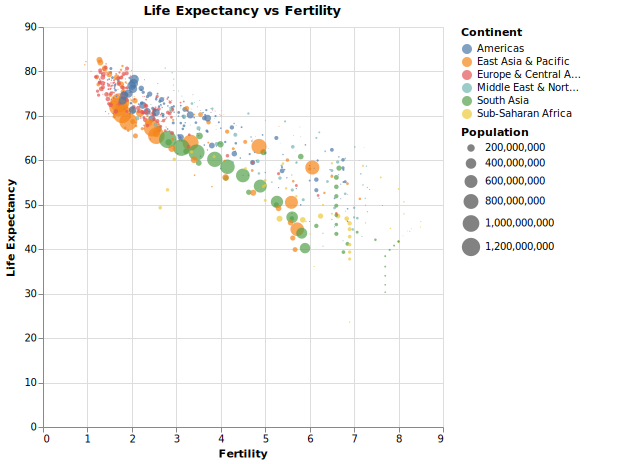

In [22]:
utils.vega.svg((vl) => vl.markCircle()
    .title('Life Expectancy vs Fertility')
    .width(400)
    .height(400)
    .data(gapMinder)
    .encode(
        vl.x().fieldQ('fertility').title('Fertility'),
        vl.y().fieldQ('life_expect').title('Life Expectancy'),
        vl.size().fieldQ('pop').title('Population'),
        vl.color().fieldN('continent').title('Continent')
))

We could filter to specifically a continent directly on the data.

![Screenshot](../img/gapMinderIndiaPakistan.png)

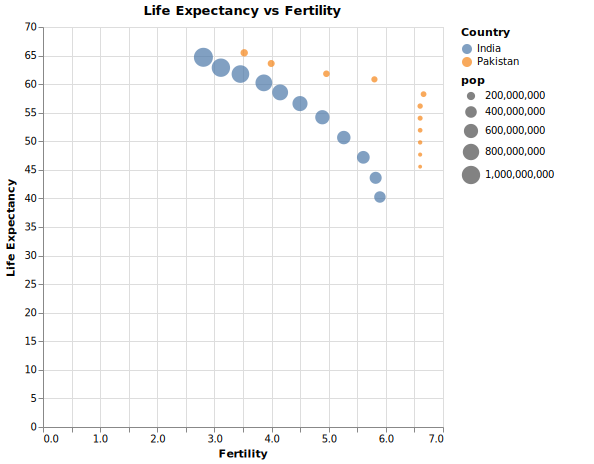

In [23]:
utils.vega.svg((vl) => vl.markCircle()
    .title('Life Expectancy vs Fertility')
    .width(400)
    .height(400)
    .data(gapMinder.filter(r => r.country === 'India' || r.country === 'Pakistan'))
    .encode(
        vl.x().fieldQ('fertility').title('Fertility'),
        vl.y().fieldQ('life_expect').title('Life Expectancy'),
        vl.size().fieldQ('pop'),
        vl.color().fieldN('country').title('Country')
))

# Aggregate Charts

One item to note is that Vega does not allow for multiple series on the same object. (At least to my understanding)

Meaning, if we have a record like the following:

country           |minPopulation|maxPopulation|avgPopulation  
--                |--           |--           |--             
Afghanistan       |8,891,209    |29,928,987   |15,869,842.455 

In [24]:
new utils.TableGenerator(utils.group.by(gapMinder, 'country')
                        .reduce((records) => ({
    minPopulation: utils.agg.min(records, 'pop'),
    maxPopulation: utils.agg.max(records, 'pop'),
    avgPopulation: utils.agg.avgMean(records, 'pop'),
})))
    .render()

country,minPopulation,maxPopulation,avgPopulation
Afghanistan,"8,891,209","29,928,987","15,869,842.455"
Argentina,"18,927,821","39,537,943","28,753,173"
Aruba,"53,865","71,566","62,591.455"
Australia,"9,277,087","20,090,437","14,755,169.545"
Austria,"6,946,885","8,184,691","7,589,899.909"
Bahamas,"87,138","301,790","206,126.545"
Bangladesh,"49,601,520","144,319,628","90,895,495.455"
Barbados,"227,255","278,870","252,070.273"
Belgium,"8,868,475","10,364,388","9,756,877.273"
Bolivia,"3,074,311","8,857,870","5,632,676.182"


We would need to separate out to multiple records to show both the min, average and mean values.

something like this:

country    |_aggregateKey|_aggregateValue
--         |--           |--             
Afghanistan|minPopulation|8,891,209      
Afghanistan|maxPopulation|29,928,987     
Afghanistan|avgPopulation|15,869,842.455

To achieve this, use [reduceSeparate()](https://jupyter-ijavascript-utils.onrender.com/SourceMap.html#.reduceSeparate) - rather than [reduce()](https://jupyter-ijavascript-utils.onrender.com/SourceMap.html#.reduce) as we have done so far:

country           |_aggregateKey|_aggregateValue
--                |--           |--             
Afghanistan       |minPopulation|8,891,209      
Afghanistan       |maxPopulation|29,928,987     
Afghanistan       |avgPopulation|15,869,842.455 
Argentina         |minPopulation|18,927,821     
Argentina         |maxPopulation|39,537,943     
Argentina         |avgPopulation|28,753,173     
Aruba             |minPopulation|53,865         
Aruba             |maxPopulation|71,566         
Aruba             |avgPopulation|62,591.455

In [25]:
new utils.TableGenerator(utils.group.by(gapMinder, 'country')
                        .reduceSeparate((records) => ({
    minPopulation: utils.agg.min(records, 'pop'),
    maxPopulation: utils.agg.max(records, 'pop'),
    avgPopulation: utils.agg.avgMean(records, 'pop'),
})))
    .render()

country,_aggregateKey,_aggregateValue
Afghanistan,minPopulation,"8,891,209"
Afghanistan,maxPopulation,"29,928,987"
Afghanistan,avgPopulation,"15,869,842.455"
Argentina,minPopulation,"18,927,821"
Argentina,maxPopulation,"39,537,943"
Argentina,avgPopulation,"28,753,173"
Aruba,minPopulation,"53,865"
Aruba,maxPopulation,"71,566"
Aruba,avgPopulation,"62,591.455"
Australia,minPopulation,"9,277,087"


This can be done with either:

* [SourceMap.reduceSeparate()](https://jupyter-ijavascript-utils.onrender.com/SourceMap.html#.reduceSeparate)
* [group.separateByFields()](https://jupyter-ijavascript-utils.onrender.com/module-group.html#.separateByFields)

# Choropleth - Data Driven Maps

A choropleth is essentially a data driven map, that changes the map in some regard based on those values.

A very familiar example are the red and blue styles shading of states for US Elections,
but can show many things such as precipitation, or heatmaps, and many other things.

![svg](../img/choropleth_workingFull.svg)

See the [Let's make a Data Driven Map: Choropleth](https://jupyter-ijavascript-utils.onrender.com/tutorial-vega_choroplethShort.html) on how you could build your own.

# Further Reading

[Very cool example of a chart done with Vega Lite on this topic](https://vega.github.io/vega/examples/global-development/)

There are a growing list of libraries that are amazing for computational journalism, data science and others.

See [this stackoverflow](https://stackoverflow.com/questions/31412537/numpy-like-package-for-node)
for someone asking why couldn't [Numpy](https://numpy.org/doc/stable/user/quickstart.html) be written in JavaScript;

## D3

D3, specifically: [group / rollup](https://observablehq.com/@d3/d3-group) and [flatGroup / flatRollup](https://observablehq.com/@d3/d3-flatgroup)

## DanfoJS
[DanfoJS](https://danfo.jsdata.org/) - a js library heavily inspired by
[Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
so someone familiar with Pandas can get up to speed very quickly

## DataFrame-JS
[dataframe-js](https://gmousse.gitbooks.io/dataframe-js/) -
provides an immutable data structure for DataFrames
which allows to work on rows and columns with a sql
and functional programming inspired api.

## StandardLib
[StdLib](https://github.com/stdlib-js/stdlib) - 
is a great library that compiles down to C/C++ level to providespeeds comparable to Numpy.

## NumJS
[ NumJS](https://www.npmjs.com/package/numjs )
is also a great number processing library.
It may not be as fast as StdLib, but it can sometimes be easier touse.